<a href="https://colab.research.google.com/github/SofiaMarchesi/House-Prices_k/blob/master/House_Prices_data_analysis%5B2%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive',force_remount=True)
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/houses_train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/houses_test.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AFlGliDyqQkF718u-4ScUgGIHJuyW3vcbJlESBH0fu2b63E-nwH98c
Mounted at /content/drive


# 1.   Libraries



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2.   Copy raw data



In [4]:
train1 = train.copy()
test1 = test.copy()
print(train1.shape)
print(test1.shape)


(1460, 81)
(1459, 80)


In [5]:
pd.set_option('display.max_rows', train1.shape[0]+1)

In [6]:
print(display(train1.head(10)))



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

None


In [7]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
train1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 3. Treating NaN values
- Make a function to fill null (NaN) values with a given value
- In categorical/object, it will be fill with 'NA' or 'None', depends of the type of the feature

In [10]:
def FillNa(df,value):
  df = df.fillna(value)
  print(df.value_counts(sort=True).iloc[:11])
  return df

# 3.1. Alley
- Analyse 'Alley' - lot of values null: 1369 - 93%
- There is 3 types: Gravel, Paved and No alley acess.
- NaN = No Alley Acess, fill with 'NA'

In [11]:
train1[~train1.Alley.isna()].groupby('Alley')['Alley'].count()

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
train1['Alley']=FillNa(train1.Alley,'NA')
test1['Alley']=FillNa(test1.Alley,'NA')

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
NA      1352
Grvl      70
Pave      37
Name: Alley, dtype: int64


# 3.2. MasVnrType and MasVnrArea
- Analyse MasVnrType e MasVnrArea, both with the same number of NaN: 8
- The NaN refers to the same houses
- [MasVnrType] Great number of houses is in 'None' (59%), so, will be fill with 'None' the 'NaN'.
- [MasVnrArea] with the same logic of MasVnrType, but fill with 0.0, because in this case, is a continuous value.

In [13]:
#The same houses have the 'NaN' in the both features, so the treat will be the same
print(train1['MasVnrType'][train1.MasVnrType.isna()])
print(train1['MasVnrArea'][train1.MasVnrArea.isna()])

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object
234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64


In [14]:
train1.MasVnrType.value_counts(normalize=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

In [15]:
train1.MasVnrArea.value_counts(normalize=True,sort=True).iloc[:11]

0.0      0.592975
72.0     0.005510
180.0    0.005510
108.0    0.005510
120.0    0.004821
16.0     0.004821
80.0     0.004132
200.0    0.004132
106.0    0.004132
340.0    0.004132
170.0    0.003444
Name: MasVnrArea, dtype: float64

In [16]:
train1['MasVnrType'] = FillNa(train1['MasVnrType'],'None')
train1['MasVnrArea'] = FillNa(train1['MasVnrArea'],0.0)

test1['MasVnrType']=FillNa(test1['MasVnrType'],'None')
test1['MasVnrArea'] = FillNa(test1['MasVnrArea'],0.0)


None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0      869
72.0       8
180.0      8
108.0      8
120.0      7
16.0       7
80.0       6
200.0      6
106.0      6
340.0      6
170.0      5
Name: MasVnrArea, dtype: int64
None       894
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64
0.0      892
176.0     10
144.0      9
120.0      8
216.0      8
200.0      7
128.0      6
504.0      6
302.0      6
198.0      6
196.0      5
Name: MasVnrArea, dtype: int64


In [17]:
train1.MasVnrType.shape

(1460,)

In [18]:
train1.MasVnrArea.shape

(1460,)

# 3.3. BsmtQual, BsmtCond, BstmExposure, BstmFinType1, BstmFinType2
- All with 37 NaN, and refers to the same houses.
- Will be fill with 'NA'

In [19]:
index_Qual = train1.BsmtQual[train1.BsmtQual.isna()].index
index_Cond = train1.BsmtCond[train1.BsmtCond.isna()].index
index_Exp = train1.BsmtExposure[train1.BsmtExposure.isna()].index
index_Type1 = train1.BsmtFinType1[train1.BsmtFinType1.isna()].index
index_Type2 = train1.BsmtFinType2[train1.BsmtFinType2.isna()].index

In [20]:
print(train1.BsmtQual.value_counts())
print(train1.BsmtCond.value_counts())
print(train1.BsmtExposure.value_counts())
print(train1.BsmtFinType1.value_counts())
print(train1.BsmtFinType2.value_counts())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [21]:
train1.BsmtQual = FillNa(train1.BsmtQual,'NA')
train1.BsmtCond = FillNa(train1.BsmtCond,'NA')
train1.BsmtExposure = FillNa(train1.BsmtExposure,'NA')
train1.BsmtFinType1 = FillNa(train1.BsmtFinType1,'NA')
train1.BsmtFinType2 = FillNa(train1.BsmtFinType2,'NA')


test1.BsmtQual = FillNa(test1.BsmtQual,'NA')
test1.BsmtCond = FillNa(test1.BsmtCond,'NA')
test1.BsmtExposure = FillNa(test1.BsmtExposure,'NA')
test1.BsmtFinType1 = FillNa(test1.BsmtFinType1,'NA')
test1.BsmtFinType2 = FillNa(test1.BsmtFinType2,'NA')


TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
TA    634
Gd    591
Ex    137
Fa     53
NA     44
Name: BsmtQual, dtype: int64
TA    1295
Fa      59
Gd      57
NA      45
Po       3
Name: BsmtCond, dtype: int64
No    951
Av    197
Gd    142
Mn    125
NA     44
Name: BsmtExposure, dtype: int64
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
NA      42
Name: BsmtFinType1, dtype: int64
Unf    1237
Rec      51
NA       42
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64


# 3.4. Electrical 
- 1 NaN
- Fill with the most commmon: 'SBrkr'

In [22]:
train1.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [23]:
train1.Electrical = FillNa(train1.Electrical,'SBrkr')

test1.Electrical = FillNa(test1.Electrical,'SBrkr')

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64


# 3.5. FirePlacesQu
- 690 NaN
- Verifying the values of 'FirePlace', witch are complete, there are 690 houses without fireplaces and 690 'NaN' in 'FirePlaceQu'. So, it will be fill with 'NA'.


In [24]:
print(train1.Fireplaces.value_counts())

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


In [25]:
train1.FireplaceQu = FillNa(train1.FireplaceQu,'NA')
test1.FireplaceQu = FillNa(test1.FireplaceQu,'NA')

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
NA    730
Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64


# 3.6.[Garages] GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageAreas,GarageQual, GarageCond
- Have 81 NaN.
- Compare the GarageCars and GarageArea witch are complete, with the incomplete features.
- So, the number of 0 in Garagecars match with the NaN of the another NaN features. Will be fill with 'NA'

In [26]:
print(train1.GarageCars.value_counts())
print(train1.GarageType.value_counts())


train1.GarageType=FillNa(train1.GarageType,'NA')
train1.GarageYrBlt=FillNa(train1.GarageYrBlt,0)
train1.GarageFinish=FillNa(train1.GarageFinish,'NA')
train1.GarageQual=FillNa(train1.GarageQual,'NA')
train1.GarageCond=FillNa(train1.GarageCond,'NA')


test1.GarageType=FillNa(test1.GarageType,'NA')
test1.GarageYrBlt=FillNa(test1.GarageYrBlt,0.0)
test1.GarageFinish=FillNa(test1.GarageFinish,'NA')
test1.GarageQual=FillNa(test1.GarageQual,'NA')
test1.GarageCond=FillNa(test1.GarageCond,'NA')


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
Name: GarageYrBlt, dtype: int64
Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64
TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Attchd     853
Detchd     392
BuiltIn     98
NA          76
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64
0.0       78
2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
2008.0 

# 3.7. Pool
- PoolArea,PoolQC(7 Non-null)
- Just 7 with values! Probably, this feature will be drop. But now, will fill with 'NA'

In [27]:
train1.PoolQC[~train1.PoolQC.isna()]


197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
Name: PoolQC, dtype: object

In [28]:
train1.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [29]:
train1.PoolQC=FillNa(train1.PoolQC,'NA')
test1.PoolQC=FillNa(test1.PoolQC,'NA')

NA    1453
Gd       3
Fa       2
Ex       2
Name: PoolQC, dtype: int64
NA    1456
Ex       2
Gd       1
Name: PoolQC, dtype: int64


# 3.8. Fence 
- 281 non-null
- Fill NaN with 'NA'

In [30]:
train1.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [31]:
train1.Fence = FillNa(train1.Fence,'NA')
test1.Fence = FillNa(test1.Fence,'NA')

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
NA       1169
MnPrv     172
GdPrv      59
GdWo       58
MnWw        1
Name: Fence, dtype: int64


# 3.9. MiscFeature
- 54 Non-null
- **Don't have 'Elev' in the feature.**
- Fill with NA in this first analysis

In [32]:
train1.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [33]:
train1.MiscFeature = FillNa(train1.MiscFeature,'NA')

test1.MiscFeature = FillNa(test1.MiscFeature,'NA')

NA      1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64
NA      1408
Shed      46
Gar2       3
Othr       2
Name: MiscFeature, dtype: int64


# 4. Transform some features in to categoricals:
1. Just change the dtype
or
2. Change to categorical with numerical scale.

# 4.1. Copy2 = train2 and test2

In [34]:
train2 = train1.copy()
test2 = test1.copy()

In [35]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
categorical = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood', 
               'Condition1', 'Condition2','BldgType','HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation',
               'Heating','HeatingQC','Electrical','GarageType','MiscFeature', 'SaleType','SaleCondition','OverallQual','OverallCond','ExterQual',
               'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','KitchenQual','Functional','Fireplaces','FireplaceQu',
               'GarageYrBlt','GarageFinish','GarageCars','GarageQual','GarageCond','PoolQC','Fence','MoSold','YrSold','CentralAir','PavedDrive']
len(categorical)

51

In [37]:
train2[categorical] = train2[categorical].astype('category')
test2[categorical] = test2[categorical].astype('category')

In [38]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

In [39]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   category
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          1459 non-null   category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1457 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   ca

# 4.2. Change some features to numerical scale

In [40]:
train2['MSSubClass'].unique()

[60, 20, 70, 50, 190, ..., 80, 160, 75, 180, 40]
Length: 15
Categories (15, int64): [60, 20, 70, 50, ..., 160, 75, 180, 40]

In [41]:
train2['MSSubClass']=train2['MSSubClass'].cat.rename_categories({20:'A',30:'B',40:'C',45:'D',50:'E',
                                                                 60:'F',70:'G',75:'H',80:'I',85:'J',
                                                                 90:'L',120:'M',150:'N',160:'O',180:'P'
                                                                 ,190:'Q'})

test2['MSSubClass']=test2['MSSubClass'].cat.rename_categories({20:'A',30:'B',40:'C',45:'D',50:'E',
                                                                 60:'F',70:'G',75:'H',80:'I',85:'J',
                                                                 90:'L',120:'M',150:'N',160:'O',180:'P'
                                                                 ,190:'Q'})


In [42]:
print(train2.MSSubClass.value_counts())

print(test2.MSSubClass.value_counts())



A    536
F    299
E    144
M     87
B     69
O     63
G     60
I     58
L     52
Q     30
J     20
H     16
D     12
P     10
C      4
Name: MSSubClass, dtype: int64
A    543
F    276
E    143
M     95
B     70
G     68
O     65
I     60
L     57
Q     31
J     28
P      7
H      7
D      6
C      2
N      1
Name: MSSubClass, dtype: int64


In [43]:
train2['ExterQual'].unique()

[Gd, TA, Ex, Fa]
Categories (4, object): [Gd, TA, Ex, Fa]

In [44]:
train2['ExterQual']=train2['ExterQual'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

test2['ExterQual']=test2['ExterQual'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

In [45]:
train2['ExterCond']=train2['ExterCond'].cat.rename_categories(({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}))
test2['ExterCond']=test2['ExterCond'].cat.rename_categories(({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}))

In [46]:
train2['BsmtQual']=train2['BsmtQual'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
test2['BsmtQual']=test2['BsmtQual'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

In [47]:
train2['BsmtCond']=train2['BsmtCond'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
test2['BsmtCond']=test2['BsmtCond'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

In [48]:
train2['BsmtExposure']=train2['BsmtExposure'].cat.rename_categories({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})

test2['BsmtExposure']=test2['BsmtExposure'].cat.rename_categories({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})

In [49]:
train2['BsmtFinType1'].unique()

[GLQ, ALQ, Unf, Rec, BLQ, NA, LwQ]
Categories (7, object): [GLQ, ALQ, Unf, Rec, BLQ, NA, LwQ]

In [50]:
train2['BsmtFinType1']=train2['BsmtFinType1'].cat.rename_categories({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

test2['BsmtFinType1']=test2['BsmtFinType1'].cat.rename_categories({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

In [51]:
train2['BsmtFinType2']=train2['BsmtFinType2'].cat.rename_categories({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

test2['BsmtFinType2']=test2['BsmtFinType2'].cat.rename_categories({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})



In [52]:
train2['GarageQual'].unique()

[TA, Fa, Gd, NA, Ex, Po]
Categories (6, object): [TA, Fa, Gd, NA, Ex, Po]

In [53]:
train2['KitchenQual']=train2['KitchenQual'].cat.rename_categories({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1})

test2['KitchenQual']=test2['KitchenQual'].cat.rename_categories({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1})

In [54]:
train2['Functional']=train2['Functional'].cat.rename_categories({'Typ':8, 'Min1':7, 'Maj1':4, 'Min2':6, 'Mod':5, 'Maj2':3, 'Sev':2,'Sal':1})

test2['Functional']=test2['Functional'].cat.rename_categories({'Typ':8, 'Min1':7, 'Maj1':4, 'Min2':6, 'Mod':5, 'Maj2':3, 'Sev':2,'Sal':1})

In [55]:
train2['FireplaceQu']=train2['FireplaceQu'].cat.rename_categories({'NA':0, 'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1})

test2['FireplaceQu']=test2['FireplaceQu'].cat.rename_categories({'NA':0, 'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1})

In [56]:
train2['GarageFinish']=train2['GarageFinish'].cat.rename_categories({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

test2['GarageFinish']=test2['GarageFinish'].cat.rename_categories({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

In [57]:
train2['GarageQual']=train2['GarageQual'].cat.rename_categories({'TA':3, 'Fa':2, 'Gd':4, 'NA':0, 'Ex':5, 'Po':1})
test2['GarageQual']=test2['GarageQual'].cat.rename_categories({'TA':3, 'Fa':2, 'Gd':4, 'NA':0, 'Ex':5, 'Po':1})

In [58]:
train2['GarageCond']=train2['GarageCond'].cat.rename_categories({'TA':3, 'Fa':2, 'Gd':4, 'NA':0, 'Ex':5, 'Po':1})
test2['GarageCond']=test2['GarageCond'].cat.rename_categories({'TA':3, 'Fa':2, 'Gd':4, 'NA':0, 'Ex':5, 'Po':1})

In [59]:
train2['PavedDrive'].unique()

[Y, N, P]
Categories (3, object): [Y, N, P]

In [60]:
train2['PavedDrive']=train2['PavedDrive'].cat.rename_categories({'Y':2,'P':1,'N':0})

test2['PavedDrive']=test2['PavedDrive'].cat.rename_categories({'Y':2,'P':1,'N':0})


In [61]:
train2['CentralAir'].unique()

[Y, N]
Categories (2, object): [Y, N]

In [62]:
train2['PoolQC']=train2['PoolQC'].cat.rename_categories({'NA':0, 'Ex':4, 'Fa':1, 'Gd':3,'TA':2})

test2['PoolQC']=test2['PoolQC'].cat.rename_categories({'NA':0, 'Ex':4, 'Fa':1, 'Gd':3,'TA':2})

In [63]:
train2['CentralAir']=train2['CentralAir'].cat.rename_categories({'Y':1,'N':0})
test2['CentralAir']=test2['CentralAir'].cat.rename_categories({'Y':1,'N':0})


In [64]:
train2['HeatingQC']=train2['HeatingQC'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

test2['HeatingQC']=test2['HeatingQC'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

In [65]:
test3 = test2.copy()
train3 = train2.copy()

In [66]:
test3[categorical].describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,HeatingQC,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PoolQC,Fence,MoSold,YrSold,CentralAir,PavedDrive
count,1459,1455,1459,1459,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1459,1459,1459,1459,1459,1459,1459,1458,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1457,1459,1459,1459.0,1459,1458.0,1459,1459,1459,1459,1459,1459,1459,1459
unique,16,5,2,3,4,4,1,5,3,25,9,5,5,7,6,4,13,15,4,6,4,5,4,7,4,9,6,10,9,4,5,5,5,5,7,7,4,7,5,6,98.0,4,6.0,5,6,3,5,12,5,2,3
top,A,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,5,SBrkr,Attchd,NA,WD,Normal,5,5,3,3,3,3,1,6,1,3,8,0,0,0.0,1,2.0,3,3,0,NA,6,2007,1,2
freq,543,1114,1453,1352,934,1311,1457,1081,1396,218,1251,1444,1205,745,1169,1442,510,510,894,661,1446,752,1337,853,1408,1258,1204,428,824,892,1256,634,1295,951,431,1237,757,1357,730,730,78.0,625,770.0,1293,1328,1456,1169,250,363,1358,1301


In [67]:
train3[categorical].describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,HeatingQC,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PoolQC,Fence,MoSold,YrSold,CentralAir,PavedDrive
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.0,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,6,6,5,5,7,5,9,6,10,9,4,5,5,5,5,7,7,4,7,4,6,98.0,4,5,6,6,4,5,12,5,2,3
top,A,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,5,SBrkr,Attchd,NA,WD,Normal,5,5,3,3,3,3,1,1,1,3,8,0,0,0.0,1,2,3,3,0,NA,6,2009,1,2
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,647,1428,741,1335,870,1406,1267,1198,397,821,906,1282,649,1311,953,430,1256,735,1360,690,690,81.0,605,824,1311,1326,1453,1179,253,338,1365,1340


### 3.10. LotFrontage 
- 259 NaN
- The majority (around 12%) is 60.
- Check the correlation between it and the other features


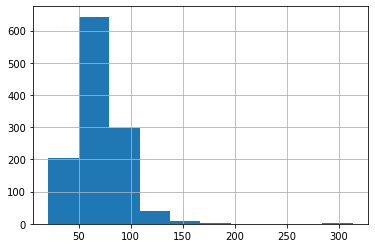

In [68]:
train2.LotFrontage.hist()

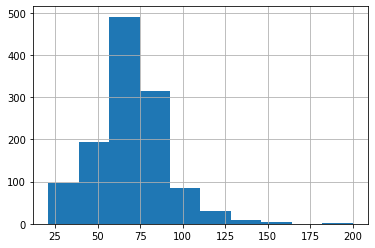

In [69]:
test2.LotFrontage.hist()

In [70]:
print(train2.LotFrontage.value_counts(ascending=False,normalize=True).iloc[:11])

60.0    0.119067
70.0    0.058285
80.0    0.057452
50.0    0.047460
75.0    0.044130
65.0    0.036636
85.0    0.033306
78.0    0.020816
21.0    0.019151
90.0    0.019151
68.0    0.015820
Name: LotFrontage, dtype: float64


In [71]:
print(test2.LotFrontage.value_counts(ascending=False,normalize=True).iloc[:11])

60.0    0.107955
80.0    0.055195
70.0    0.051136
50.0    0.048701
75.0    0.042208
65.0    0.039773
85.0    0.029221
63.0    0.024351
24.0    0.024351
21.0    0.021916
68.0    0.020292
Name: LotFrontage, dtype: float64


In [72]:
corr_all = train2.corr()
corr_lot_noDrop = corr_all['LotFrontage'].sort_values(ascending=False).drop('SalePrice')

In [73]:
print(corr_lot_noDrop)
corr_lot_noDropList = list(corr_lot_noDrop.index)[1:-1]
corr_lot_noDropList

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
GarageArea       0.344997
BedroomAbvGr     0.263170
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.192411
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
EnclosedPorch    0.010700
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
Name: LotFrontage, dtype: float64


['1stFlrSF',
 'LotArea',
 'GrLivArea',
 'TotalBsmtSF',
 'TotRmsAbvGrd',
 'GarageArea',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'PoolArea',
 'FullBath',
 'MasVnrArea',
 'OpenPorchSF',
 'BsmtUnfSF',
 'YearBuilt',
 'BsmtFullBath',
 'YearRemodAdd',
 'WoodDeckSF',
 '2ndFlrSF',
 '3SsnPorch',
 'HalfBath',
 'BsmtFinSF2',
 'ScreenPorch',
 'LowQualFinSF',
 'EnclosedPorch',
 'MiscVal',
 'KitchenAbvGr',
 'BsmtHalfBath']

In [74]:
corr_all_true = test2.corr()
corr_lot_noDrop_true = corr_all_true['LotFrontage'].sort_values(ascending=False,)
corr_lot_noDrop_true

LotFrontage      1.000000
LotArea          0.644608
1stFlrSF         0.461239
GarageArea       0.375581
GrLivArea        0.357125
TotRmsAbvGrd     0.344366
TotalBsmtSF      0.315802
MasVnrArea       0.248433
BedroomAbvGr     0.205100
BsmtFinSF1       0.204621
OpenPorchSF      0.179795
FullBath         0.163078
WoodDeckSF       0.157426
PoolArea         0.134232
BsmtFullBath     0.127314
YearBuilt        0.122356
ScreenPorch      0.113444
YearRemodAdd     0.092603
BsmtUnfSF        0.092031
MiscVal          0.068161
BsmtFinSF2       0.046824
HalfBath         0.023850
KitchenAbvGr     0.016072
EnclosedPorch    0.013340
Id               0.009930
2ndFlrSF        -0.036185
LowQualFinSF    -0.037294
3SsnPorch       -0.037487
BsmtHalfBath    -0.042779
Name: LotFrontage, dtype: float64

- outliers in LotFrontage over 140
- Outlier in LotArea over 20000

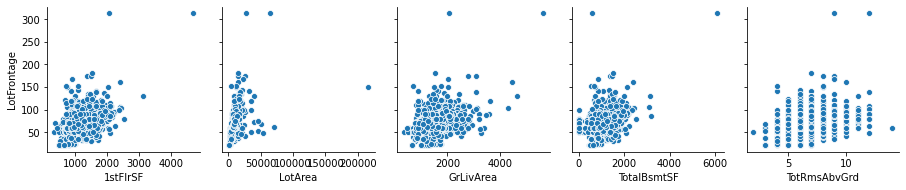

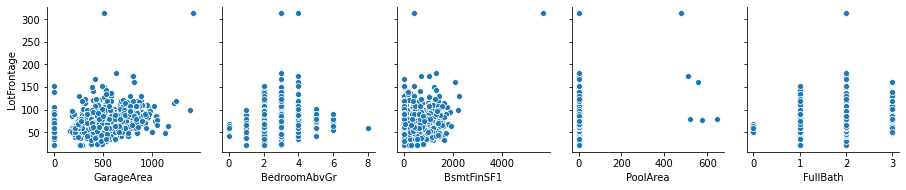

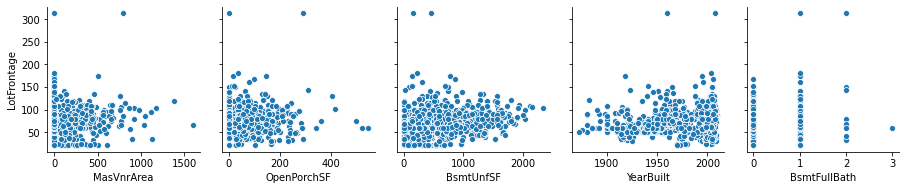

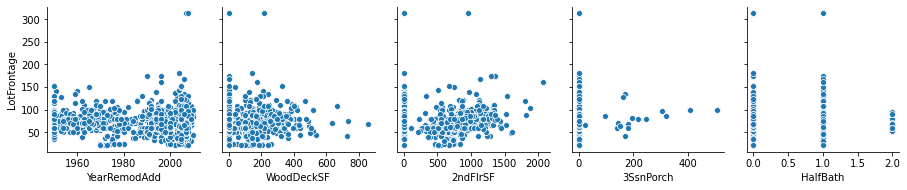

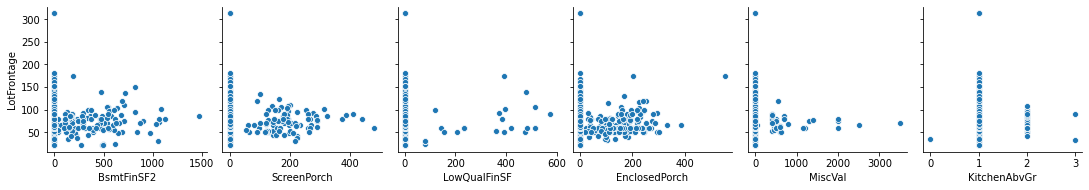

In [75]:
g = sns.PairGrid(train2,x_vars=corr_lot_noDropList[:5],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(train2,x_vars=corr_lot_noDropList[5:10],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(train2,x_vars=corr_lot_noDropList[10:15],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(train2,x_vars=corr_lot_noDropList[15:20],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(train2,x_vars=corr_lot_noDropList[20:26],y_vars='LotFrontage',)
g.map(sns.scatterplot)

- Copy3 = train3
- Remove some outliers of positive correlation

In [76]:
train3 = train2.copy()
test3 = test3.copy()

In [77]:
drop1_ =  train3.drop(labels = train3[train3['LotFrontage']>140].index)
drop2 = drop1_.drop(drop1_[drop1_['LotArea']>20000].index)


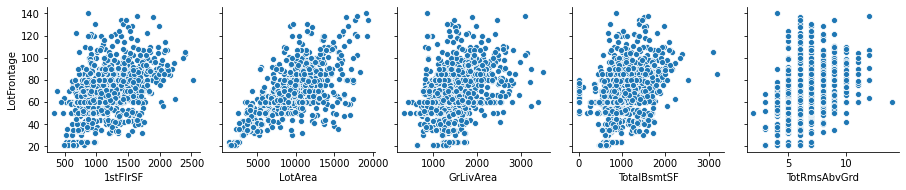

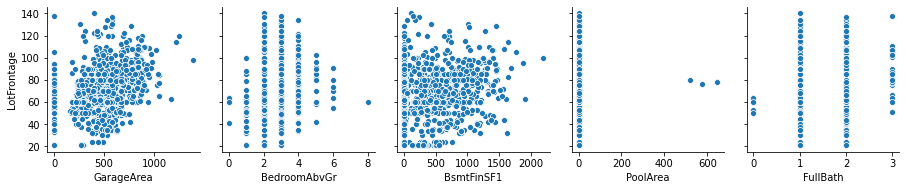

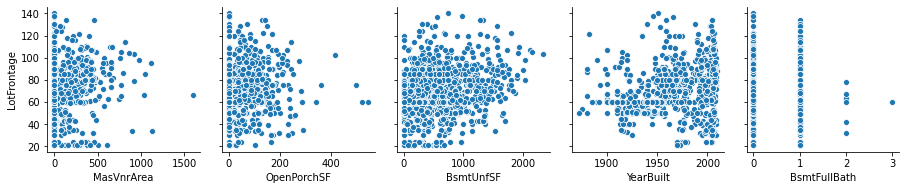

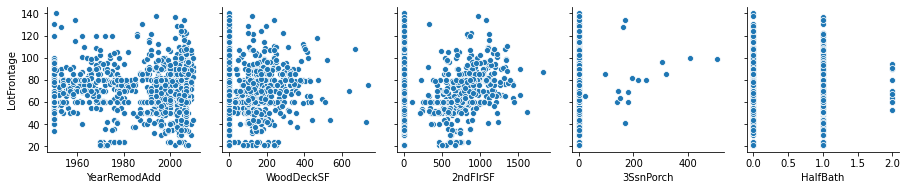

In [78]:
g = sns.PairGrid(drop2,x_vars=corr_lot_noDropList[:5],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(drop2,x_vars=corr_lot_noDropList[5:10],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(drop2,x_vars=corr_lot_noDropList[10:15],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(drop2,x_vars=corr_lot_noDropList[15:20],y_vars='LotFrontage',)
g.map(sns.scatterplot)

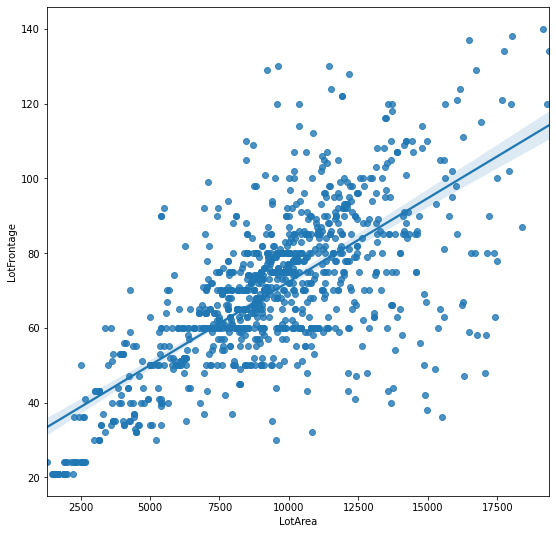

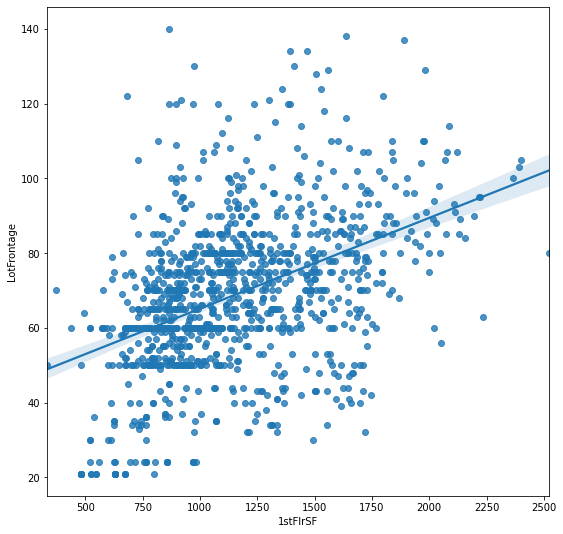

In [79]:
f1, ax1 = plt.subplots(figsize=(9,9))
sns.regplot(x='LotArea',y='LotFrontage',data=drop2)

f2, ax2 = plt.subplots(figsize=(9,9))
sns.regplot(x='1stFlrSF',y='LotFrontage',data=drop2)

# 3.10.1. Correlation after drop outliers

In [80]:
corr_all_drop = drop2.corr()
corr_lot_drop = corr_all_drop['LotFrontage'].sort_values(ascending=False).drop(['LotFrontage','Id','PoolArea'])
print(corr_lot_drop)

LotArea          0.707043
1stFlrSF         0.431821
SalePrice        0.397203
TotalBsmtSF      0.371145
GrLivArea        0.364812
GarageArea       0.364480
TotRmsAbvGrd     0.349913
BedroomAbvGr     0.279904
MasVnrArea       0.203250
FullBath         0.198463
BsmtUnfSF        0.185318
YearBuilt        0.145023
BsmtFinSF1       0.144051
OpenPorchSF      0.136988
WoodDeckSF       0.117729
3SsnPorch        0.092635
YearRemodAdd     0.084594
ScreenPorch      0.072335
BsmtFinSF2       0.058380
HalfBath         0.058261
BsmtFullBath     0.052464
2ndFlrSF         0.043419
MiscVal          0.013597
LowQualFinSF     0.013446
KitchenAbvGr     0.002773
BsmtHalfBath    -0.015707
EnclosedPorch   -0.018625
Name: LotFrontage, dtype: float64


In [81]:
corr_lot_list = list(corr_lot_drop.index)

corr_lot_list

['LotArea',
 '1stFlrSF',
 'SalePrice',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'TotRmsAbvGrd',
 'BedroomAbvGr',
 'MasVnrArea',
 'FullBath',
 'BsmtUnfSF',
 'YearBuilt',
 'BsmtFinSF1',
 'OpenPorchSF',
 'WoodDeckSF',
 '3SsnPorch',
 'YearRemodAdd',
 'ScreenPorch',
 'BsmtFinSF2',
 'HalfBath',
 'BsmtFullBath',
 '2ndFlrSF',
 'MiscVal',
 'LowQualFinSF',
 'KitchenAbvGr',
 'BsmtHalfBath',
 'EnclosedPorch']

In [82]:
continues = ['LotArea',
 '1stFlrSF',
 'SalePrice',
 'GrLivArea',
 'TotRmsAbvGrd',
 'MasVnrArea',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'OpenPorchSF',
 'WoodDeckSF',
 'ScreenPorch',
 '2ndFlrSF',
 'BsmtHalfBath',
 'EnclosedPorch']

# 3.10.2. Split the data in  NotNan (train/test)  and NaN (prediction)

# Copy 
train3 = drop2
test3 = test2

In [83]:
train3 = drop2.copy()
#test4 = drop3_true.copy()
test3 = test2.copy()

In [84]:
# Filtrar os valores com NaN e os sem NaN
#Sem NaN, serão os valores do modelo
train_notnan = train3[~train3.LotFrontage.isna()]
#Com NaN, os que serão preditados
train_nan = train3[train3.LotFrontage.isna()]

In [85]:
# Filtrar os valores com NaN e os sem NaN
#Sem NaN, serão os valores do modelo
test_notnan_true = test3[~test3.LotFrontage.isna()]
#Com NaN, os que serão preditados
test_nan_true= test3[test3.LotFrontage.isna()]

In [86]:
train_nan = train_nan.drop('LotFrontage',axis=1)

In [87]:
test_nan_true = test_nan_true.drop('LotFrontage',axis=1)

In [88]:
#train_nan_pred = train_nan[importance_lot1]

In [89]:
train_nan.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,F,RL,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,3,3,CBlock,4,3,2,5,859,4,32,216,1107,GasA,5,1,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,8,2,3,Attchd,1973.0,2,2,484,3,3,2,235,204,228,0,0,0,0,NA,Shed,350,11,2009,WD,Normal,200000
12,13,A,RL,12968,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,3,3,CBlock,3,3,1,5,737,1,0,175,912,GasA,3,1,SBrkr,912,0,0,912,1,0,1,0,2,1,3,4,8,0,0,Detchd,1962.0,1,1,352,3,3,2,140,0,0,0,176,0,0,NA,NA,0,9,2008,WD,Normal,144000
14,15,A,RL,10920,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,3,3,CBlock,3,3,1,4,733,1,0,520,1253,GasA,3,1,SBrkr,1253,0,0,1253,1,0,1,1,2,1,3,5,8,1,2,Attchd,1960.0,2,1,352,3,3,2,0,213,176,0,0,0,0,GdWo,NA,0,5,2008,WD,Normal,157000
16,17,A,RL,11241,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,3,3,CBlock,3,3,1,5,578,1,0,426,1004,GasA,5,1,SBrkr,1004,0,0,1004,1,0,1,0,2,1,3,5,8,1,3,Attchd,1970.0,3,2,480,3,3,2,0,0,0,0,0,0,0,NA,Shed,700,3,2010,WD,Normal,149000
24,25,A,RL,8246,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,3,4,CBlock,3,3,2,3,188,5,668,204,1060,GasA,5,1,SBrkr,1060,0,0,1060,1,0,1,0,3,1,4,6,8,1,3,Attchd,1968.0,1,1,270,3,3,2,406,90,0,0,0,0,0,MnPrv,NA,0,5,2010,WD,Normal,154000
31,32,A,RL,8544,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,3,3,1,1,0,1,0,1228,1228,GasA,4,1,SBrkr,1228,0,0,1228,0,0,1,1,3,1,4,6,8,0,0,Attchd,1966.0,1,1,271,3,3,2,0,65,0,0,0,0,0,MnPrv,NA,0,6,2008,WD,Normal,149350
42,43,J,RL,9180,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,4,3,3,5,747,2,93,0,840,GasA,4,1,SBrkr,884,0,0,884,1,0,1,0,2,1,4,5,8,0,0,Attchd,1983.0,2,2,504,3,4,2,240,0,0,0,0,0,0,MnPrv,NA,0,12,2007,WD,Normal,144000
43,44,A,RL,9200,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1980,Hip,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,4,3,3,2,280,4,491,167,938,GasA,3,1,SBrkr,938,0,0,938,1,0,1,0,3,1,3,5,8,0,0,Detchd,1977.0,1,1,308,3,3,2,145,0,0,0,0,0,0,MnPrv,NA,0,7,2008,WD,Normal,130250
50,51,F,RL,13869,Pave,NA,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,3,6,182,1,0,612,794,GasA,4,1,SBrkr,794,676,0,1470,0,1,2,0,3,1,3,6,8,0,0,Attchd,1997.0,3,2,388,3,3,2,0,75,0,0,0,0,0,NA,NA,0,7,2007,WD,Normal,177000
64,65,F,RL,9375,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,3,3,PConc,4,3,1,6,739,1,0,318,1057,GasA,5,1,SBrkr,1057,977,0,2034,1,0,2,1,3,1,4,8,8,0,0,Attchd,1998.0,2,2,645,3,3,2,576,36,0,0,0,0,0,GdPrv,NA,0,2,2009,WD,Normal,219500


In [90]:
train_notnan.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,F,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,...,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,Attchd,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,2,A,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,...,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,Attchd,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,3,F,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,...,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,Attchd,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,4,G,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,...,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,Detchd,1998.0,1,3,642,3,3,2,0,35,272,0,0,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,F,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,...,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,Attchd,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,NA,NA,0,12,2008,WD,Normal,250000
5,6,E,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,Wood,4,3,1,6,732,1,0,64,796,GasA,...,1,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,8,0,0,Attchd,1993.0,1,2,480,3,3,2,40,30,0,320,0,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,A,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,4,3,PConc,5,3,3,6,1369,1,0,317,1686,GasA,...,1,SBrkr,1694,0,0,1694,1,0,2,0,3,1,4,7,8,1,4,Attchd,2004.0,2,2,636,3,3,2,255,57,0,0,0,0,0,NA,NA,0,8,2007,WD,Normal,307000
8,9,E,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,3,3,BrkTil,3,3,1,1,0,1,0,952,952,GasA,...,1,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,7,2,3,Detchd,1931.0,1,2,468,2,3,2,90,0,205,0,0,0,0,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,Q,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,3,1,6,851,1,0,140,991,GasA,...,1,SBrkr,1077,0,0,1077,1,0,1,0,2,2,3,5,8,2,3,Attchd,1939.0,2,1,205,4,3,2,0,4,0,0,0,0,0,NA,NA,0,1,2008,WD,Normal,118000
10,11,A,RL,70.0,11200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,3,3,1,3,906,1,0,134,1040,GasA,...,1,SBrkr,1040,0,0,1040,1,0,1,0,3,1,3,5,8,0,0,Detchd,1965.0,1,1,384,3,3,2,0,0,0,0,0,0,0,NA,NA,0,2,2008,WD,Normal,129500


# 3.10.3. Training the model with Scikit-learn
1. LinearRegression
2. SVR
3. KNN
4. RandomForestRegressor

# 3.10.4. LinearRegression
Number of features 28 best Score: 0.5450884054466814

In [91]:
#y = train_notnan['LotFrontage']
#X = StandardScaler().fit_transform(train_notnan[corr_lot_list])
#X = train_notnan[importance_lot1]
#X = StandardScaler().fit_transform(train_notnan[['1stFlrSF','LotArea']])

In [92]:
result={}
y = train_notnan['LotFrontage']
features = []
for feature in corr_lot_list:
  features.append(feature)
  X = StandardScaler().fit_transform(train_notnan[features])
  lr = LinearRegression(n_jobs=-1).fit(X,y)
  result[lr.score(X,y)] = len(features)
print(result)
print('Number of features {} best Score: {}'. format(result[max(result)],max(result)))


{0.49991027355621165: 1, 0.5180526176722521: 2, 0.5185747653086108: 3, 0.518713211354255: 4, 0.5189491208406638: 5, 0.5253821486013952: 6, 0.5270798687236162: 7, 0.5335850303524208: 8, 0.5351379585544815: 9, 0.5363883965828304: 10, 0.5367541342829742: 11, 0.5367781684417409: 12, 0.5372022347778986: 13, 0.5372878956050107: 14, 0.5380927663761115: 15, 0.5404146919766604: 16, 0.5418368027159923: 17, 0.5424888876027975: 19, 0.5424901318380311: 20, 0.5429851920145939: 21, 0.5438946195836355: 22, 0.5438966753543535: 24, 0.5439555573958881: 25, 0.5442041354192124: 26, 0.5450350356895028: 27}
Number of features 27 best Score: 0.5450350356895028


# 3.10.5. SVR
- **12 FEATURES**

Best params SVR: {'C': 25, 'epsilon': 4, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score SVR: 0.5791982973228207

In [93]:
'''result = {}
best_params = {}
features2 = [] 
for feature in corr_lot_list:
  features2.append(feature)
  y = train_notnan['LotFrontage']
  X = StandardScaler().fit_transform(train_notnan[features2])
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)


  param = {'C':[0.0001,0.001,0.01,0.1,1,5,10,15,20,25,30,35,40,45,50,100],
         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'degree':[1],
         'gamma': ['scale','auto'],
         'epsilon': [0.0001,0.001,0.01,0.1,1,5]}

  svr_gr= GridSearchCV(SVR(),param,n_jobs=-1,cv=5).fit(X_train,y_train)
  result[len(features2)]=svr_gr.best_score_
  best_params[len(features2)] = svr_gr.best_params_

best_score = max(zip(result.values(),result.keys()))
print(best_score)
print(best_params[best_score[1]])'''

"result = {}\nbest_params = {}\nfeatures2 = [] \nfor feature in corr_lot_list:\n  features2.append(feature)\n  y = train_notnan['LotFrontage']\n  X = StandardScaler().fit_transform(train_notnan[features2])\n  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)\n\n\n  param = {'C':[0.0001,0.001,0.01,0.1,1,5,10,15,20,25,30,35,40,45,50,100],\n         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],\n         'degree':[1],\n         'gamma': ['scale','auto'],\n         'epsilon': [0.0001,0.001,0.01,0.1,1,5]}\n\n  svr_gr= GridSearchCV(SVR(),param,n_jobs=-1,cv=5).fit(X_train,y_train)\n  result[len(features2)]=svr_gr.best_score_\n  best_params[len(features2)] = svr_gr.best_params_\n\nbest_score = max(zip(result.values(),result.keys()))\nprint(best_score)\nprint(best_params[best_score[1]])"

In [94]:
'''y = train_notnan['LotFrontage']
X = StandardScaler().fit_transform(train_notnan[corr_lot_list[:12]])
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)
param = {'C':range(5,31),
         'kernel': ['rbf'],
         'gamma': ['auto'],
         'epsilon': range(1,10)}

svr_gr= GridSearchCV(SVR(),param,n_jobs=-1,cv=5).fit(X_train,y_train)

print('Best params SVR: {}'.format(svr_gr.best_params_))
print('Best Score SVR: {}'.format(svr_gr.best_score_))'''

"y = train_notnan['LotFrontage']\nX = StandardScaler().fit_transform(train_notnan[corr_lot_list[:12]])\nX_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)\nparam = {'C':range(5,31),\n         'kernel': ['rbf'],\n         'gamma': ['auto'],\n         'epsilon': range(1,10)}\n\nsvr_gr= GridSearchCV(SVR(),param,n_jobs=-1,cv=5).fit(X_train,y_train)\n\nprint('Best params SVR: {}'.format(svr_gr.best_params_))\nprint('Best Score SVR: {}'.format(svr_gr.best_score_))"

Best params SVR: {'C': 25, 'epsilon': 4, 'gamma': 'auto', 'kernel': 'rbf'} Best Score SVR: 0.5791982973228207

In [95]:
y = train_notnan['LotFrontage']
X = StandardScaler().fit_transform(train_notnan[corr_lot_list[:4]])
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)

In [96]:
svr = SVR(C=25,epsilon=4,gamma='auto',kernel='rbf').fit(X_train,y_train)
svr_cross = cross_val_score(svr,X_train,y_train,n_jobs=-1,cv=10)

In [97]:
print('Cross validation Scores:\n', (svr_cross))
print('Cross validation Scores Média:\n', (svr_cross.mean()))
print('Score test {:.4f}'.format(svr.score(X_test,y_test)))
print('Score train: {:.4f}'.format(svr.score(X_train,y_train)))


Cross validation Scores:
 [0.59694433 0.60948113 0.72160036 0.58965938 0.40400939 0.35134827
 0.59681483 0.61380272 0.59739049 0.52949897]
Cross validation Scores Média:
 0.5610549884473526
Score test 0.4863
Score train: 0.6300


# 3.10.6. KNN
- **5 FEATURES**

Best params SVR: {'algorithm': 'auto', 'n_neighbors': 24, 'weights': 'distance'}
Best Score SVR: 0.572008710651611

In [98]:
'''result_knn = {}
best_params_knn = {}
features_knn = [] 
for feature in corr_lot_list:
  features_knn.append(feature)
  y = train_notnan['LotFrontage']
  X = StandardScaler().fit_transform(train_notnan[features_knn])
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)


  param = {
         'n_neighbors':[3,5,10,15,20,25,30,35,40,45,50],
         'weights':['uniform','distance'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

  knn_gr = GridSearchCV(KNeighborsRegressor(n_jobs=-1),param,cv=5).fit(X_train,y_train)

  result_knn[len(features_knn)]=knn_gr.best_score_
  best_params_knn[len(features_knn)] = knn_gr.best_params_

best_score_knn = max(zip(result_knn.values(),result_knn.keys()))
print(best_score_knn)
print(best_params_knn[best_score_knn[1]])'''

"result_knn = {}\nbest_params_knn = {}\nfeatures_knn = [] \nfor feature in corr_lot_list:\n  features_knn.append(feature)\n  y = train_notnan['LotFrontage']\n  X = StandardScaler().fit_transform(train_notnan[features_knn])\n  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)\n\n\n  param = {\n         'n_neighbors':[3,5,10,15,20,25,30,35,40,45,50],\n         'weights':['uniform','distance'],\n         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}\n\n  knn_gr = GridSearchCV(KNeighborsRegressor(n_jobs=-1),param,cv=5).fit(X_train,y_train)\n\n  result_knn[len(features_knn)]=knn_gr.best_score_\n  best_params_knn[len(features_knn)] = knn_gr.best_params_\n\nbest_score_knn = max(zip(result_knn.values(),result_knn.keys()))\nprint(best_score_knn)\nprint(best_params_knn[best_score_knn[1]])"

In [99]:
'''y = train_notnan['LotFrontage']
X = StandardScaler().fit_transform(train_notnan[corr_lot_list[:5]])
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)


param = {
         'n_neighbors':range(10,51),
         'weights':['uniform','distance'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gr = GridSearchCV(KNeighborsRegressor(n_jobs=-1),param,cv=5).fit(X_train,y_train)

print('Best params SVR: {}'.format(knn_gr.best_params_))
print('Best Score SVR: {}'.format(knn_gr.best_score_))'''

"y = train_notnan['LotFrontage']\nX = StandardScaler().fit_transform(train_notnan[corr_lot_list[:5]])\nX_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)\n\n\nparam = {\n         'n_neighbors':range(10,51),\n         'weights':['uniform','distance'],\n         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}\n\nknn_gr = GridSearchCV(KNeighborsRegressor(n_jobs=-1),param,cv=5).fit(X_train,y_train)\n\nprint('Best params SVR: {}'.format(knn_gr.best_params_))\nprint('Best Score SVR: {}'.format(knn_gr.best_score_))"

# 3.10.7. Ridge
(0.5252017229231246, 9)
{'alpha': 22}

In [100]:
'''result_rid = {}
best_params_rid = {}
features_rid = [] 
for feature in corr_lot_list:
  features_rid.append(feature)
  y = train_notnan['LotFrontage']
  X = StandardScaler().fit_transform(train_notnan[features_rid])
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)

  param = {
         'alpha': range(1,51)}

  rid_gr = GridSearchCV(Ridge(random_state=0),param,cv=5).fit(X_train,y_train)

  result_rid[len(features_rid)]=rid_gr.best_score_
  best_params_rid[len(features_rid)] = rid_gr.best_params_
  
  best_score_rid = max(zip(result_rid.values(),result_rid.keys()))
print(best_score_rid)
print(best_params_rid[best_score_rid[1]])
  '''


"result_rid = {}\nbest_params_rid = {}\nfeatures_rid = [] \nfor feature in corr_lot_list:\n  features_rid.append(feature)\n  y = train_notnan['LotFrontage']\n  X = StandardScaler().fit_transform(train_notnan[features_rid])\n  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)\n\n  param = {\n         'alpha': range(1,51)}\n\n  rid_gr = GridSearchCV(Ridge(random_state=0),param,cv=5).fit(X_train,y_train)\n\n  result_rid[len(features_rid)]=rid_gr.best_score_\n  best_params_rid[len(features_rid)] = rid_gr.best_params_\n  \n  best_score_rid = max(zip(result_rid.values(),result_rid.keys()))\nprint(best_score_rid)\nprint(best_params_rid[best_score_rid[1]])\n  "

# 3.10.8. Lasso

In [101]:
'''result_lass = {}
best_params_lass = {}
features_lass = [] 
for feature in corr_lot_list:
  features_lass.append(feature)
  y = train_notnan['LotFrontage']
  X = StandardScaler().fit_transform(train_notnan[features_lass])
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)

  param = {
         'n_neighbors':[3,5,10,15,20,25,30,35,40,45,50],
         'weights':['uniform','distance'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

  lass_gr = GridSearchCV(KNeighborsRegressor(n_jobs=-1),param,cv=5).fit(X_train,y_train)

  result_lass[len(features_lass)]=lass_gr.best_score_
  best_params_lass[len(features_lass)] = lass_gr.best_params_

best_score_lass = max(zip(result_lass.values(),result_lass.keys()))
print(best_score_lass)
print(best_params_lass[best_score_lass[1]])
'''

"result_lass = {}\nbest_params_lass = {}\nfeatures_lass = [] \nfor feature in corr_lot_list:\n  features_lass.append(feature)\n  y = train_notnan['LotFrontage']\n  X = StandardScaler().fit_transform(train_notnan[features_lass])\n  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)\n\n  param = {\n         'n_neighbors':[3,5,10,15,20,25,30,35,40,45,50],\n         'weights':['uniform','distance'],\n         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}\n\n  lass_gr = GridSearchCV(KNeighborsRegressor(n_jobs=-1),param,cv=5).fit(X_train,y_train)\n\n  result_lass[len(features_lass)]=lass_gr.best_score_\n  best_params_lass[len(features_lass)] = lass_gr.best_params_\n\nbest_score_lass = max(zip(result_lass.values(),result_lass.keys()))\nprint(best_score_lass)\nprint(best_params_lass[best_score_lass[1]])\n"

# 3.10.9. RandomForestRegressor
- The best score, chosen to predict the values of LoTFrontage

In [102]:
#Numerical category
cat_num = ['OverallQual', 'OverallCond','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
           'HeatingQC','CentralAir', 'KitchenQual', 'Functional', 'Fireplaces','FireplaceQu', 'GarageFinish','GarageCars', 'GarageQual', 'GarageCond',
           'PavedDrive', 'YrSold']

In [103]:
#Float and Integer values
cat_cont = list(train_notnan.select_dtypes(include=['int','float']).head(5).drop(['SalePrice','Id','LotFrontage'],axis=1).columns)

In [104]:
#Append both (numerical categorical, float and integer values) in one list of features to train in to RandomForestRegressor
feat_RF_lot = ['LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageArea',
'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal', 'OverallQual', 'OverallCond','ExterQual', 'ExterCond',
'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC','CentralAir', 'KitchenQual', 'Functional', 'Fireplaces','FireplaceQu',
'GarageFinish','GarageCars', 'GarageQual', 'GarageCond','PavedDrive', 'YrSold']


In [105]:
X = train_notnan[feat_RF_lot]
y = train_notnan['LotFrontage']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)

In [106]:
'''param = {'n_estimators':[150],
         'max_depth':[9],
         'min_samples_split':[1,2],
         'min_samples_leaf':[5,6,7,8,9],
         'max_leaf_nodes':[None]     
         }
forest_cv = GridSearchCV(RandomForestRegressor(n_jobs=-1,random_state=0),param,cv=5,n_jobs=-1).fit(X_train,y_train)

print('Melhores parâmetros RandomForest: {}'.format(forest_cv.best_params_))
print('Melhor score RandomForest: {}'.format(forest_cv.best_score_))'''

"param = {'n_estimators':[150],\n         'max_depth':[9],\n         'min_samples_split':[1,2],\n         'min_samples_leaf':[5,6,7,8,9],\n         'max_leaf_nodes':[None]     \n         }\nforest_cv = GridSearchCV(RandomForestRegressor(n_jobs=-1,random_state=0),param,cv=5,n_jobs=-1).fit(X_train,y_train)\n\nprint('Melhores parâmetros RandomForest: {}'.format(forest_cv.best_params_))\nprint('Melhor score RandomForest: {}'.format(forest_cv.best_score_))"

In [107]:
forest = RandomForestRegressor(max_depth=9,n_estimators=150,max_leaf_nodes=None, min_samples_leaf=7, min_samples_split=2,random_state=0).fit(X_train,y_train)

In [108]:
#Analyzing the features that most influenced the model

importance_lot = pd.DataFrame({'Features': X.columns,'Importance':forest.feature_importances_}).sort_values(by='Importance',ascending=False)

features_importance_lot = list(importance_lot.Features)


In [109]:
importance_lot

,Features,Importance
0,LotArea,0.726490
1,YearBuilt,0.040047
19,GarageArea,0.034647
7,TotalBsmtSF,0.029817
8,1stFlrSF,0.028341
11,GrLivArea,0.024048
6,BsmtUnfSF,0.015644
20,WoodDeckSF,0.012254
42,GarageFinish,0.008931
3,MasVnrArea,0.008662


In [110]:
#There are 43 features influenced
importance_lot[importance_lot.Importance!=0].count()

Features      43
Importance    43
dtype: int64

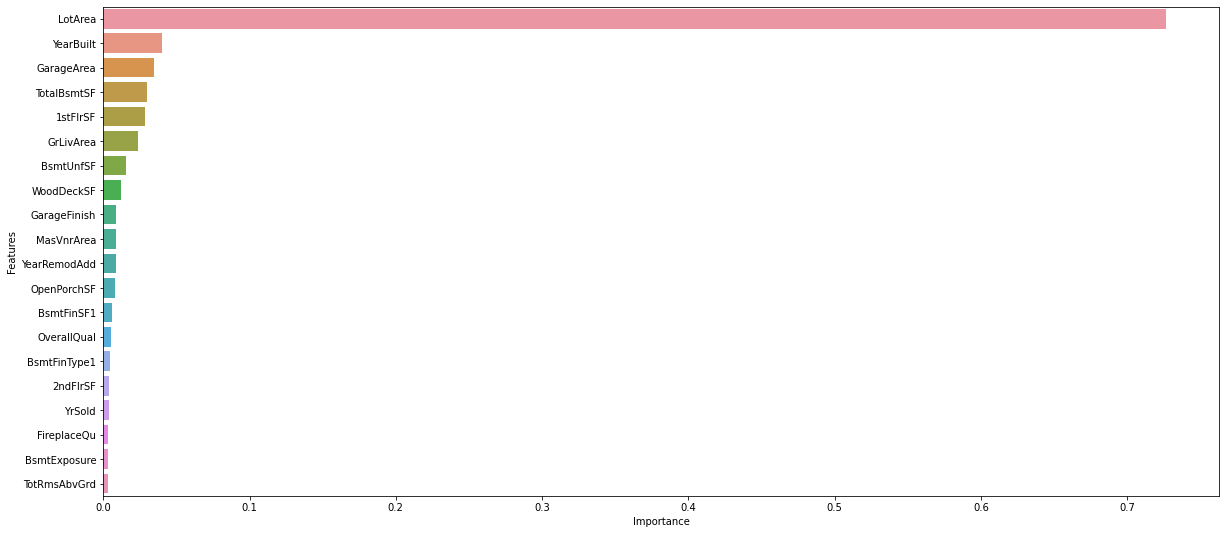

In [111]:
f3, ax3 = plt.subplots(figsize=(20,9))
sns.barplot(y='Features',x='Importance',data=importance_lot[:20],orient='h')

# 3.10.9.1. RandomForest with just features importance > 0
- Melhores parâmetros RandomForest: {'max_depth': 9, 'max_leaf_nodes': None, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 200}
Melhor score RandomForest: 0.5875671740409405



In [112]:
X = X[features_importance_lot[:43]]
y = train_notnan['LotFrontage']
#X = StandardScaler().fit_transform(train_notnan[all_lot[:6]])
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)

In [113]:
'''param = {'n_estimators':[200],
         'max_depth':[8,9,10],
         'min_samples_split':[2,3,4],
         'min_samples_leaf':[8,9,10],
         'max_leaf_nodes':[None,1,2]     
         }
forest_cv = GridSearchCV(RandomForestRegressor(n_jobs=-1,random_state=0),param,cv=5,n_jobs=-1).fit(X_train,y_train)

print('Melhores parâmetros RandomForest: {}'.format(forest_cv.best_params_))
print('Melhor score RandomForest: {}'.format(forest_cv.best_score_))'''

"param = {'n_estimators':[200],\n         'max_depth':[8,9,10],\n         'min_samples_split':[2,3,4],\n         'min_samples_leaf':[8,9,10],\n         'max_leaf_nodes':[None,1,2]     \n         }\nforest_cv = GridSearchCV(RandomForestRegressor(n_jobs=-1,random_state=0),param,cv=5,n_jobs=-1).fit(X_train,y_train)\n\nprint('Melhores parâmetros RandomForest: {}'.format(forest_cv.best_params_))\nprint('Melhor score RandomForest: {}'.format(forest_cv.best_score_))"

In [114]:
forest = RandomForestRegressor(n_estimators=200,max_depth=9,max_leaf_nodes=None,min_samples_leaf=9,min_samples_split=3,random_state=0,n_jobs=1).fit(X_train,y_train)
#forest_cross = cross_val_score(forest,X_train,y_train,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)
forest_cross = cross_val_score(forest,X_train,y_train,n_jobs=-1,cv=10)


In [115]:
print('Cross validation Scores:\n', (forest_cross))
print('Cross validation Scores Média:\n', (forest_cross.mean()))
print('Score test {:.4f}'.format(forest.score(X_test,y_test)))
print('Score train: {:.4f}'.format(forest.score(X_train,y_train)))

Cross validation Scores:
 [0.62464236 0.60197481 0.73039079 0.62057244 0.3893084  0.44192609
 0.64385139 0.60289919 0.63301263 0.53347426]
Cross validation Scores Média:
 0.5822052364486265
Score test 0.5517
Score train: 0.7673


In [116]:
y_pred_lot= forest.predict(train_nan[features_importance_lot[:43]])
y_pred_lot = y_pred_lot.round()

In [117]:
y_pred_lot_true= forest.predict(test_nan_true[features_importance_lot[:43]])
y_pred_lot_true = y_pred_lot_true.round()

In [118]:
lot_predict = pd.DataFrame({'Id':train_nan.index,'LotFrontage':y_pred_lot})
lot_predict = lot_predict.set_index('Id')
lot_predict_ = lot_predict.round()


In [119]:
lot_predict_true = pd.DataFrame({'Id':test_nan_true.index,'LotFrontage':y_pred_lot_true})
lot_predict_true = lot_predict_true.set_index('Id')
lot_predict_true_ = lot_predict_true.round()

# 3.10.9.2. Null values define with RandomForest


In [120]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1401 non-null   int64   
 1   MSSubClass     1401 non-null   category
 2   MSZoning       1401 non-null   category
 3   LotFrontage    1162 non-null   float64 
 4   LotArea        1401 non-null   int64   
 5   Street         1401 non-null   category
 6   Alley          1401 non-null   category
 7   LotShape       1401 non-null   category
 8   LandContour    1401 non-null   category
 9   Utilities      1401 non-null   category
 10  LotConfig      1401 non-null   category
 11  LandSlope      1401 non-null   category
 12  Neighborhood   1401 non-null   category
 13  Condition1     1401 non-null   category
 14  Condition2     1401 non-null   category
 15  BldgType       1401 non-null   category
 16  HouseStyle     1401 non-null   category
 17  OverallQual    1401 non-null   ca

In [121]:
drop3 = train3.fillna({'LotFrontage': lot_predict_.LotFrontage})

In [122]:
train3.LotFrontage.head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [123]:
drop3.LotFrontage.head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7    84.0
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [124]:
drop3_true = test3.fillna({'LotFrontage':lot_predict_true_.LotFrontage})

In [125]:
drop3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1401 non-null   int64   
 1   MSSubClass     1401 non-null   category
 2   MSZoning       1401 non-null   category
 3   LotFrontage    1401 non-null   float64 
 4   LotArea        1401 non-null   int64   
 5   Street         1401 non-null   category
 6   Alley          1401 non-null   category
 7   LotShape       1401 non-null   category
 8   LandContour    1401 non-null   category
 9   Utilities      1401 non-null   category
 10  LotConfig      1401 non-null   category
 11  LandSlope      1401 non-null   category
 12  Neighborhood   1401 non-null   category
 13  Condition1     1401 non-null   category
 14  Condition2     1401 non-null   category
 15  BldgType       1401 non-null   category
 16  HouseStyle     1401 non-null   category
 17  OverallQual    1401 non-null   ca

In [126]:
drop3_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   category
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1459 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          1459 non-null   category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1457 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   ca

# 5.  Data analysis of SalePrice (target)

In [127]:
train4 = drop3.copy()

In [128]:
test4 = drop3_true.copy()

In [129]:
corr_= train4.corr().drop('Id', axis=1).drop('Id', axis=0)
corr_price_ = corr_.SalePrice.sort_values(ascending=False).drop(['SalePrice'])
corr_price_pos = corr_price_[corr_price_>=0].sort_values(ascending=False)
corr_price_neg = corr_price_[corr_price_<0].sort_values()

corr_price = corr_price_pos.append(corr_price_neg)

corr_price

GrLivArea        0.708498
TotalBsmtSF      0.649054
GarageArea       0.643795
1stFlrSF         0.630201
FullBath         0.575539
YearBuilt        0.565095
YearRemodAdd     0.541303
TotRmsAbvGrd     0.531812
MasVnrArea       0.462035
LotArea          0.414296
LotFrontage      0.395320
BsmtFinSF1       0.377008
OpenPorchSF      0.330902
WoodDeckSF       0.310231
2ndFlrSF         0.276098
HalfBath         0.275365
BsmtUnfSF        0.247079
BsmtFullBath     0.216319
BedroomAbvGr     0.158138
ScreenPorch      0.102603
3SsnPorch        0.045951
PoolArea         0.031143
EnclosedPorch   -0.146794
KitchenAbvGr    -0.140894
LowQualFinSF    -0.064691
BsmtHalfBath    -0.038642
MiscVal         -0.020925
BsmtFinSF2      -0.019468
Name: SalePrice, dtype: float64

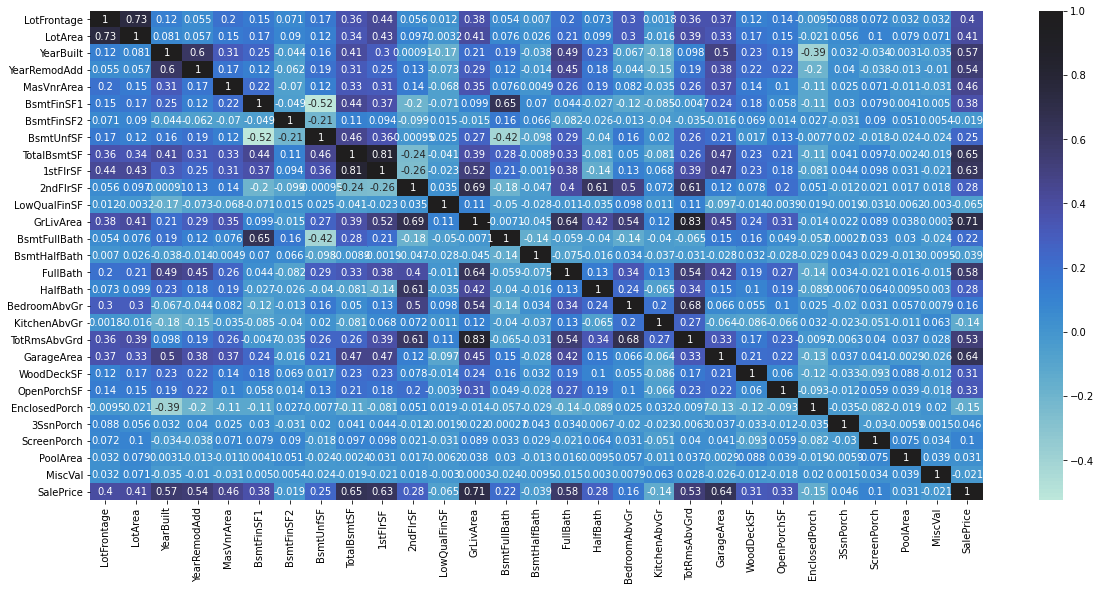

In [130]:
f2, ax2 = plt.subplots(figsize=(20,9))
sns.heatmap(corr_,annot=True,center=1)

In [169]:
test5 = test4.copy()
train5 = train4.copy()

In [170]:

#Features to transform in to dummies variables
encode= ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1', 
'Condition2','BldgType','HouseStyle','YearBuilt', 'YearRemodAdd','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation',
'Heating','HeatingQC', 'CentralAir','Electrical', 'GarageType','GarageYrBlt','Fence', 'MiscFeature',  'YrSold', 'SaleType','SaleCondition']

# Fill with the most frequently value - category values
test_nan_categ =['MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','GarageCars','SaleType']

#Fill with de mean - float and integer values
test_nan_float= ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageArea']

- Fill the float and integer with mean

In [171]:
fill_float = test5[test_nan_float].mean().round()
fill_float

BsmtFinSF1       439.0
BsmtFinSF2        53.0
BsmtUnfSF        554.0
TotalBsmtSF     1046.0
BsmtFullBath       0.0
BsmtHalfBath       0.0
GarageArea       473.0
dtype: float64

In [172]:
test5 = test5.fillna(fill_float)

- Fill the category values with most frequently

In [200]:
test5 = test5.fillna({'MSZoning':test5.MSZoning.value_counts().index[0]})
test5 = test5.fillna({'Utilities':test5.Utilities.value_counts().index[0]})
test5 = test5.fillna({'Exterior2nd':test5.Exterior2nd.value_counts().index[0]})
test5 = test5.fillna({'KitchenQual':test5.KitchenQual.value_counts().index[0]})
test5 = test5.fillna({'Functional':test5.Functional.value_counts().index[0]})
test5 = test5.fillna({'GarageCars':test5.GarageCars.value_counts().index[0]})
test5 = test5.fillna({'SaleType':test5.SaleType.value_counts().index[0]})

# 6. Machine Learning to predict the SalePrice values

In [ ]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(X_true[test_nan_categ])
imp_float = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X_true[test_nan_float])